In [2]:
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [3]:
def theta_of_angle(u, s1, s2, s3):
    A = u.select_atoms(s1).center_of_geometry()
    B = u.select_atoms(s2).center_of_geometry()
    C = u.select_atoms(s3).center_of_geometry()

    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

In [4]:
#these = [292, 297, 306]

#        [[5C65 G284 F289 D298],
#         [4ZW9 G285 Y290 K297],
#         [6RW3 E323 N316 G309],
#         [4JA3 V303 L297 G292], (T306 instead of V303 when not crystals)
#         [4JA4 V303 L297 G292]]

these_11 = np.asarray([[284, 289, 298],
         [284, 289, 297],
         [309, 314, 323],
         [292, 297, 303],
         [292, 297, 303]])

these = np.asarray([[363, 377, 391],
         [363, 377, 391],
         [389, 403, 416],
         [369, 383, 396],
         [369, 383, 396]])

theta_u7 = []
count = 0
for ap in ['5c65','4zw9','6rw3','4ja3','4ja4']:
    u = mda.Universe('/Users/claudia/Downloads/%s.pdb' %ap, \
            '/Users/claudia/Downloads/%s.pdb' %ap)
    for ts in u.trajectory:
        theta = theta_of_angle(u, s1 = 'resid %s and backbone' %these[count,0], 
                               s2 = 'resid %s and backbone' %these[count,1], 
                               s3 = 'resid %s and backbone' %these[count,2])
        theta_u7.append(theta)
    count = count + 1 
    
plt.scatter(range(5),theta_u7)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/claudia/Downloads/5c65.pdb'

([<matplotlib.axis.XTick at 0x7f9692786b80>,
 [Text(0, 0, '5c65'),
  Text(1, 0, '4zw9'),
  Text(2, 0, '6rw3'),
  Text(3, 0, '4ja3'),
  Text(4, 0, '4ja4')])

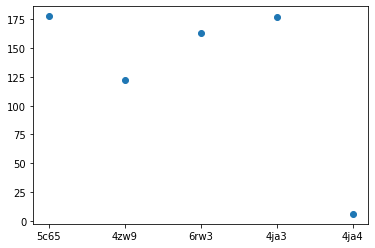

In [19]:
plt.scatter(range(5),theta_u7)

plt.xticks(range(5),['5c65','4zw9','6rw3','4ja3','4ja4'])

In [21]:
#these = [412, 425, 437]

these = np.asarray([[401,412,425],
         [401,412,425], 
         [426, 438, 450],
         [407, 418, 431],
         [407, 418, 431]])

theta_u10 = []
count = 0
for ap in ['5c65','4zw9','6rw3','4ja3','4ja4']:
    u = mda.Universe('%s.pdb' %ap, \
            '%s.pdb' %ap)
    for ts in u.trajectory:
        theta = theta_of_angle(u, s1 = 'resid %s  and backbone' %these[count,0], 
                               s2 = 'resid %s  and backbone' %these[count,1], 
                               s3 = 'resid %s  and backbone' %these[count,2])
        theta_u10.append(theta)


/Users/claudia/miniconda3/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: CD
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/Users/claudia/miniconda3/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: LU
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


([<matplotlib.axis.XTick at 0x7f96930e0730>,
 [Text(0, 0, '5c65'),
  Text(1, 0, '4zw9'),
  Text(2, 0, '6rw3'),
  Text(3, 0, '4ja3'),
  Text(4, 0, '4ja4')])

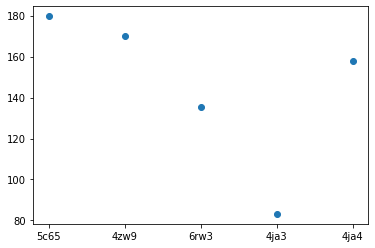

In [23]:
plt.scatter(range(5),theta_u10)

plt.xticks(range(5),['5c65','4zw9','6rw3','4ja3','4ja4'])